# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Profa. Andreza C. Beezão Moreira (DMM/UFLA)
#### Prof. Mayron César O. Moreira (DCC/UFLA)
#### Aluno Lucas Malachias Furtado

*Gerando um grafo não-direcionado conexo*

### Variáveis de Decisão

- \( x_i pertence à \{0, 1\} \): indica a qual conjunto o vértice \( i \) pertence.  
  Se \( x_i = 1 \), o vértice \( i \) pertence ao conjunto \( V_1 \); caso contrário, pertence ao conjunto \( V_2 \).

- \( y_{ij} pertence à \{0, 1\} \): indica se a aresta \( (i, j) pertence à A \) conecta os dois conjuntos \( V_1 \) e \( V_2 \).  
  Se \( y_{ij} = 1 \), a aresta conecta os dois conjuntos.


## Função Objetivo

Maximizar o número de arestas que conectam os dois conjuntos: \begin{equation} \max Z = \sum_{(i, j) \in A} y_{ij} \end{equation}

## Restrições

- Definir se uma aresta conecta os dois conjuntos:

\begin{equation} y_{ij} \leq x_i + x_j, \quad \forall (i, j) \in A \end{equation} \begin{equation} y_{ij} \leq 2 - (x_i + x_j), \quad \forall (i, j) \in A \end{equation}

Essas restrições garantem que y_ij=1 somente quando xi≠xj​.

- Variáveis binárias:

\begin{equation} x_i \in {0, 1}, \quad \forall i \in V \end{equation} \begin{equation} y_{ij} \in {0, 1}, \quad \forall (i, j) \in A \end{equation}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 13.5 MB/s eta 0:00:00


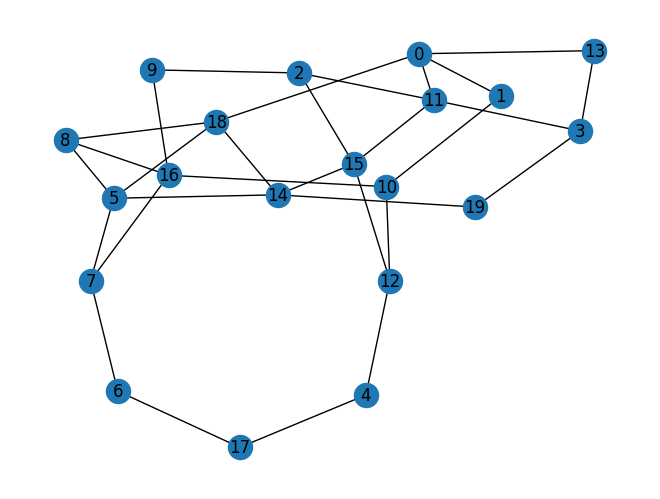

In [1]:
!pip install pulp
import pulp
import networkx as nx
import random
import matplotlib.pyplot as plt

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
    if(m < n - 1 or m > n * (n - 1) // 2):
      return None

    grafo = nx.Graph()
    vertices = list(range(n))
    grafo.add_nodes_from(vertices)
    random.shuffle(vertices)
    for i in range(n - 1):
        grafo.add_edge(vertices[i], vertices[i + 1])

    while grafo.number_of_edges() < m:
        u, v = random.sample(vertices, 2)
        if not grafo.has_edge(u, v):
            grafo.add_edge(u, v)

    return grafo

n = 20
m = 30
grafo = gera_grafo_nao_direcionado_conexo(n, m)

if(grafo != None):
  nx.draw(grafo, with_labels=True)
  plt.show()


In [2]:
if (grafo != None):
    model = pulp.LpProblem("Problema_1", pulp.LpMaximize)

    # Variáveis de decisão
    x = {i: pulp.LpVariable(f"x_{i}", cat="Binary") for i in grafo.nodes}
    y = {(i, j): pulp.LpVariable(f"y_{i}_{j}", cat="Binary") for i, j in grafo.edges}

    # Função objetivo
    model += pulp.lpSum(y[i, j] for i, j in grafo.edges)

    # Restrições
    for i, j in grafo.edges:
        model += y[i, j] <= x[i] + x[j], f"y_{i}_{j}_def1"
        model += y[i, j] <= 2 - (x[i] + x[j]), f"y_{i}_{j}_def2"

    # Resolver o modelo
    model.solve()

    # Resultados
    if model.status == pulp.LpStatusOptimal:
        print("Vértices no conjunto V1:")
        for i in grafo.nodes:
            if x[i].value() == 1:
                print(f"Vértice {i}")
        print("Número máximo de arestas entre V1 e V2:")
        print(pulp.value(model.objective))
    else:
        print("Não foi possível encontrar uma solução.")

Vértices no conjunto V1:
Vértice 1
Vértice 2
Vértice 5
Vértice 6
Vértice 11
Vértice 12
Vértice 13
Vértice 16
Vértice 18
Vértice 19
Número máximo de arestas entre V1 e V2:
26.0
